### Opinion Review 데이터 셋을 이용한 문서 유사도 측정

In [35]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환. 
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환. 
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [36]:
import pandas as pd
import glob, os
from sklearn.features_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

path = r'/Users/vin_ah/Documents/AI SCHOOL/ML/chapter8/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
	df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
	filename_ = file_.split('/')[-1]
	filename = filename_.split('.')[0]
	filename_list.append(filename)
	opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})


tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
							 ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [42]:
all_files

['/Users/vin_ah/Documents/AI SCHOOL/ML/chapter8/OpinosisDataset1.0/topics/battery-life_ipod_nano_8gb.txt.data',
 '/Users/vin_ah/Documents/AI SCHOOL/ML/chapter8/OpinosisDataset1.0/topics/gas_mileage_toyota_camry_2007.txt.data',
 '/Users/vin_ah/Documents/AI SCHOOL/ML/chapter8/OpinosisDataset1.0/topics/room_holiday_inn_london.txt.data',
 '/Users/vin_ah/Documents/AI SCHOOL/ML/chapter8/OpinosisDataset1.0/topics/location_holiday_inn_london.txt.data',
 '/Users/vin_ah/Documents/AI SCHOOL/ML/chapter8/OpinosisDataset1.0/topics/staff_bestwestern_hotel_sfo.txt.data',
 '/Users/vin_ah/Documents/AI SCHOOL/ML/chapter8/OpinosisDataset1.0/topics/voice_garmin_nuvi_255W_gps.txt.data',
 '/Users/vin_ah/Documents/AI SCHOOL/ML/chapter8/OpinosisDataset1.0/topics/speed_garmin_nuvi_255W_gps.txt.data',
 '/Users/vin_ah/Documents/AI SCHOOL/ML/chapter8/OpinosisDataset1.0/topics/size_asus_netbook_1005ha.txt.data',
 '/Users/vin_ah/Documents/AI SCHOOL/ML/chapter8/OpinosisDataset1.0/topics/screen_garmin_nuvi_255W_gps.tx

In [41]:
document_df

,filename,opinion_text,cluster_label
0,battery-life_ipod_nano_8gb,...,1
1,gas_mileage_toyota_camry_2007,...,2
2,room_holiday_inn_london,...,0
3,location_holiday_inn_london,...,0
4,staff_bestwestern_hotel_sfo,...,0
5,voice_garmin_nuvi_255W_gps,...,1
6,speed_garmin_nuvi_255W_gps,...,1
7,size_asus_netbook_1005ha,...,1
8,screen_garmin_nuvi_255W_gps,...,1
9,battery-life_amazon_kindle,...,1


In [37]:
document_df[document_df['cluster_label']==0]

,filename,opinion_text,cluster_label
2,room_holiday_inn_london,...,0
3,location_holiday_inn_london,...,0
4,staff_bestwestern_hotel_sfo,...,0
13,service_swissotel_hotel_chicago,...,0
16,service_bestwestern_hotel_sfo,...,0
17,food_holiday_inn_london,...,0
20,staff_swissotel_chicago,...,0
27,service_holiday_inn_london,...,0
28,price_holiday_inn_london,...,0
30,rooms_swissotel_chicago,...,0


In [38]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==0].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[-6]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)


호텔로 클러스터링 된 문서들의 DataFrame Index: Index([2, 3, 4, 13, 16, 17, 20, 27, 28, 30, 31, 32, 39, 46, 49, 50], dtype='int64')
##### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo  와 타 문서 유사도######
[[1.         0.19917258 0.22235374 0.37631406 0.26026786 0.15836737
  0.19544761 0.40020673 0.31124876 0.77312013 0.51442299 0.15026112
  0.16717527 0.81484367 0.11154184 0.10831277]]


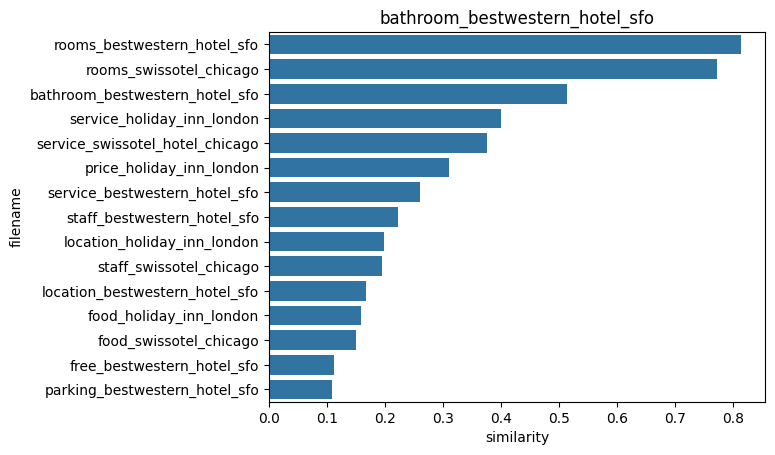

In [39]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

fig1 = plt.gcf()
sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)
fig1.savefig('p553_hotel.tif', format='tif', dpi=300, bbox_inches='tight')

In [40]:
hotel_1_sim_df

,filename,similarity
46,rooms_bestwestern_hotel_sfo,0.814844
30,rooms_swissotel_chicago,0.773120
31,bathroom_bestwestern_hotel_sfo,0.514423
27,service_holiday_inn_london,0.400207
13,service_swissotel_hotel_chicago,0.376314
28,price_holiday_inn_london,0.311249
16,service_bestwestern_hotel_sfo,0.260268
4,staff_bestwestern_hotel_sfo,0.222354
3,location_holiday_inn_london,0.199173
20,staff_swissotel_chicago,0.195448
